In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objetivo del Estudio
Ver que escuela tiene mejor promedio y cuales son sus caracteristicas que más resaltan con respecto a la otra entidad


# Curiosidad:
Ver que escuela tiene mejores promedios

# Contexto de la Base de Datos
Se tienen dos escuelas en las cuales se está dando matemáticas y ingles, donde se quiere saber cuales son las variables que más influyen el desempeño de las notas de un estudiante.




In [ ]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#!pip install ydata_profiling
#import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase

# Descripción de las Variables del DataSet

#Variables Numéricas

age: Representa la edad del estudiante. Es una variable numérica que indica la edad en años.

traveltime: Representa el tiempo de viaje desde el hogar a la escuela en minutos. Es una variable numérica.

studytime: Indica el tiempo de estudio semanal del estudiante en horas. Es una variable numérica.

failures: Representa la cantidad de clases reprobadas por el estudiante. Es una variable numérica.

absences: Representa la cantidad de ausencias del estudiante en la escuela. Es una variable numérica.

G1: Representa la calificación del estudiante en el primer período.

G2: Representa la calificación del estudiante en el segundo período.

G3: Representa la calificación final del estudiante en el tercer período.

#Variables Categóricas

school: Representa el nombre de la escuela a la que pertenece el estudiante. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "GP" y "MS" si son dos escuelas diferentes.

sex: Indica el género del estudiante. Es una variable categórica que puede ser "M" para masculino o "F" para femenino.

address: Indica el tipo de dirección del estudiante. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "U" para urbano y "R" para rural.

famsize: Representa el tamaño de la familia del estudiante. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "LE3" si el tamaño de la familia es menor o igual a 3 y "GT3" si es mayor a 3.

Pstatus: Indica el estado de convivencia de los padres del estudiante. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "T" si los padres están viviendo juntos y "A" si están separados.

Medu: Representa la educación de la madre del estudiante. Es una variable numérica que indica el nivel de educación de la madre en una escala de 0 a 4, donde 0 es "ninguna" y 4 es "educación superior".

Fedu: Representa la educación del padre del estudiante. Es una variable numérica similar a Medu, pero indica el nivel de educación del padre.

Mjob: Indica el trabajo de la madre del estudiante. Es una variable categórica que puede tener diferentes valores, por ejemplo, "teacher", "health", "services", "at_home" o "other".

Fjob: Indica el trabajo del padre del estudiante. Es una variable categórica similar a Mjob, pero indica el trabajo del padre.

reason: Representa la razón para elegir la escuela. Es una variable categórica que puede tener diferentes valores, por ejemplo, "home", "reputation", "course" o "other".

guardian: Indica el tutor legal del estudiante. Es una variable categórica que puede tener diferentes valores, por ejemplo, "mother", "father" o "other".

schoolsup: Indica si el estudiante recibió apoyo educativo extra de la escuela. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

famsup: Indica si el estudiante recibió apoyo educativo extra de la familia. Es una variable categórica similar a schoolsup.

paid: Indica si el estudiante recibió clases particulares pagadas. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

activities: Indica si el estudiante participa en actividades extracurriculares. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

nursery: Indica si el estudiante asistió a una guardería infantil. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

higher: Indica si el estudiante tiene la intención de continuar su educación superior. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

internet: Indica si el estudiante tiene acceso a internet en casa. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

romantic: Indica si el estudiante tiene una relación romántica. Es una variable categórica que puede tener dos posibles valores, por ejemplo, "yes" o "no".

famrel: Representa la calidad de las relaciones familiares del estudiante en una escala de 1 a 5, donde 1 es "muy malas" y 5 es "excelentes".

freetime: Representa el tiempo libre del estudiante en una escala de 1 a 5, donde 1 es "muy poco" y 5 es "mucho".

goout: Representa la frecuencia con la que el estudiante sale con amigos en una escala de 1 a 5, donde 1 es "muy poco" y 5 es "mucho".

Dalc: Representa el consumo de alcohol en días de semana en una escala de 1 a 5, donde 1 es "muy bajo" y 5 es "muy alto".

Walc: Representa el consumo de alcohol en fines de semana en una escala de 1 a 5, donde 1 es "muy bajo" y 5 es "muy alto".

health: Representa el estado de salud del estudiante en una escala de 1 a 5, donde 1 es "muy malo" y 5 es "muy bueno".


In [ ]:
a = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/AlcoholEstudiantes/student-por.csv")
df = a.dropna()
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
#limites del dataset son [0,649]
tam_muestra = 500
school = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 500 registros


In [ ]:
factor = list(school.loc[:,school.nunique() < 10]);
school[factor] = school[factor].astype('category')
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 636 to 410
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      500 non-null    category
 1   sex         500 non-null    category
 2   age         500 non-null    category
 3   address     500 non-null    category
 4   famsize     500 non-null    category
 5   Pstatus     500 non-null    category
 6   Medu        500 non-null    category
 7   Fedu        500 non-null    category
 8   Mjob        500 non-null    category
 9   Fjob        500 non-null    category
 10  reason      500 non-null    category
 11  guardian    500 non-null    category
 12  traveltime  500 non-null    category
 13  studytime   500 non-null    category
 14  failures    500 non-null    category
 15  schoolsup   500 non-null    category
 16  famsup      500 non-null    category
 17  paid        500 non-null    category
 18  activities  500 non-null    category
 19  nurser

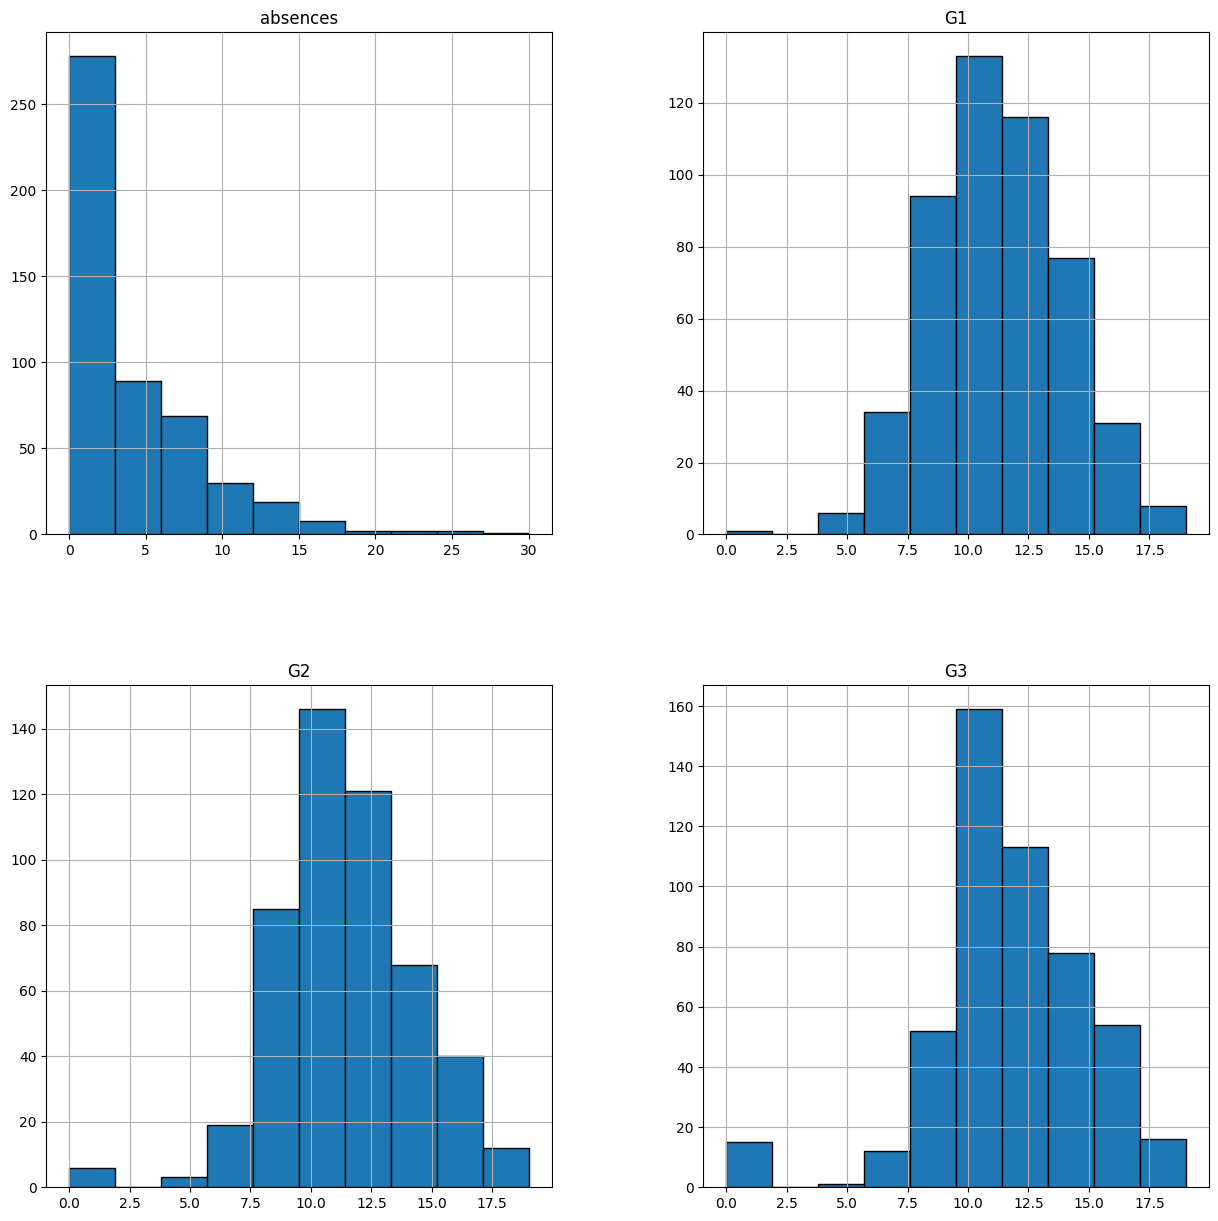

In [ ]:
school.hist(edgecolor='black',figsize=(15,15))
plt.show()

#Estudio de las Distribución

G1: La mayoría de los estudiantes obtienen calificaciones bastante mediocres, ya que la media se encuentra en un promedio de 11 y la moda está en aproximadamente 10, lo cual es una nota muy baja en la escala del 0 al 20 que se está utilizando. Esta distribución tiende hacia la derecha, ya que hay más estudiantes con calificaciones bajas que con calificaciones altas.

G2: Se observa un patrón bastante similar al anterior, con la diferencia de que ahora hay menos notas entre 5 y 7.5. Lo más probable es que sean estudiantes que no querían fracasar y se esforzaron para mejorar sus calificaciones y salir del área de riesgo de reprobar. También aumentaron los ceros, lo cual puede deberse a que algunos estudiantes decidieron retirar la materia.

G3: Los ceros se duplicaron y las calificaciones pésimas bajaron aún más. Esto es algo común en las escuelas, ya que por lo general, el tercer trimestre es la temporada en la que algunos estudiantes intentan remontar sus calificaciones. Es contradictorio, ya que por lo general los temas más complejos se abordan al final del año escolar. También se observa una mejora en las calificaciones en el rango de 15 a 17.5.

# Ranking de Variables


In [ ]:
school['school'] = school['school'].apply(lambda x: 1 if x == 'GP' else 0)
school['school'] = school['school'].astype(int)
school['PromedioGs'] = school[['G1', 'G2', 'G3']].mean(axis=1)
school['PromedioGs'].head()



636    18.000000
220    11.333333
594    18.000000
429    10.666667
72     11.666667
Name: PromedioGs, dtype: float64

In [ ]:
school['school'].value_counts()

1    329
0    171
Name: school, dtype: int64

In [ ]:
HonorMS = len(school.loc[(school['school'] == 0) & (school['PromedioGs'] >= 17)])
HonorGP = len(school.loc[(school['school'] == 1) & (school['PromedioGs'] >= 17)])

In [ ]:
print(HonorMS)
print(HonorGP)

8
14


In [ ]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(school.apply(lambda x: cramers_v(x,school['school'])),columns=['VCramer'])
cramertop12 = tablaCramer.VCramer.sort_values(ascending=False)[:12]
cramertop12 = pd.DataFrame(cramertop12,columns=['VCramer'])
px.bar(cramertop12,x=cramertop12.VCramer,title='Relaciones frente a la Escuela').update_yaxes(categoryorder="total ascending").show()


Nos interesa estudiar las variables númericas del dataSet y sus diferencias con respecto a cada escuela.

<ipython-input-55-1e8198e86feb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



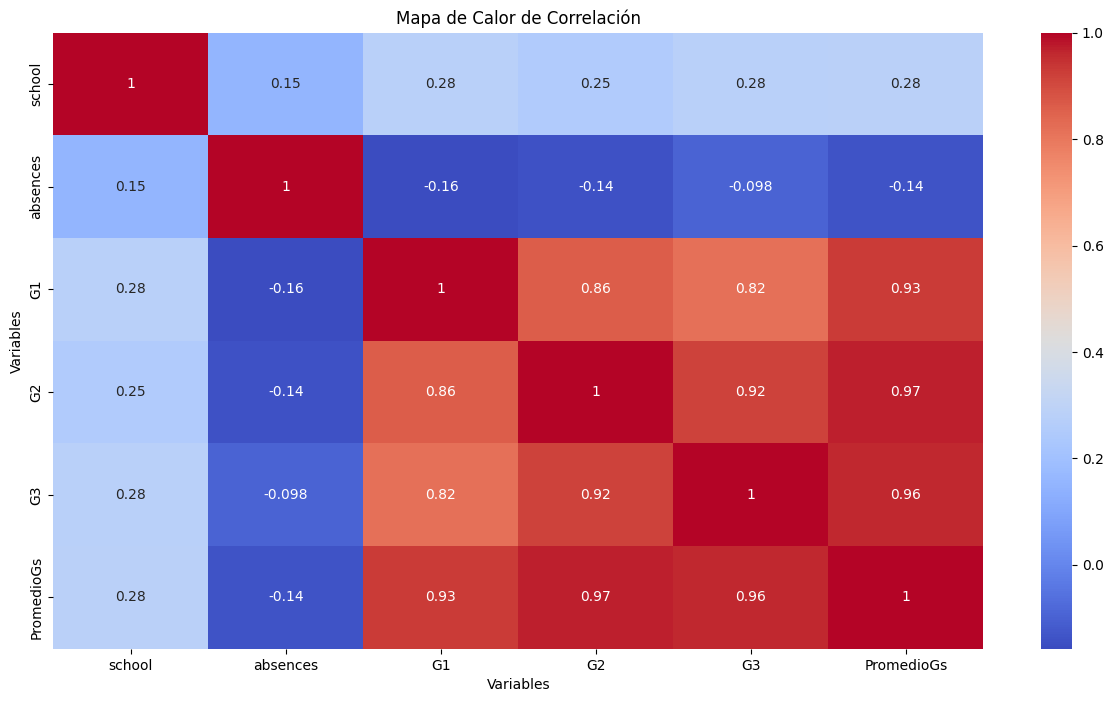

In [ ]:
correlation_matrix = school.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(15, 8))

# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

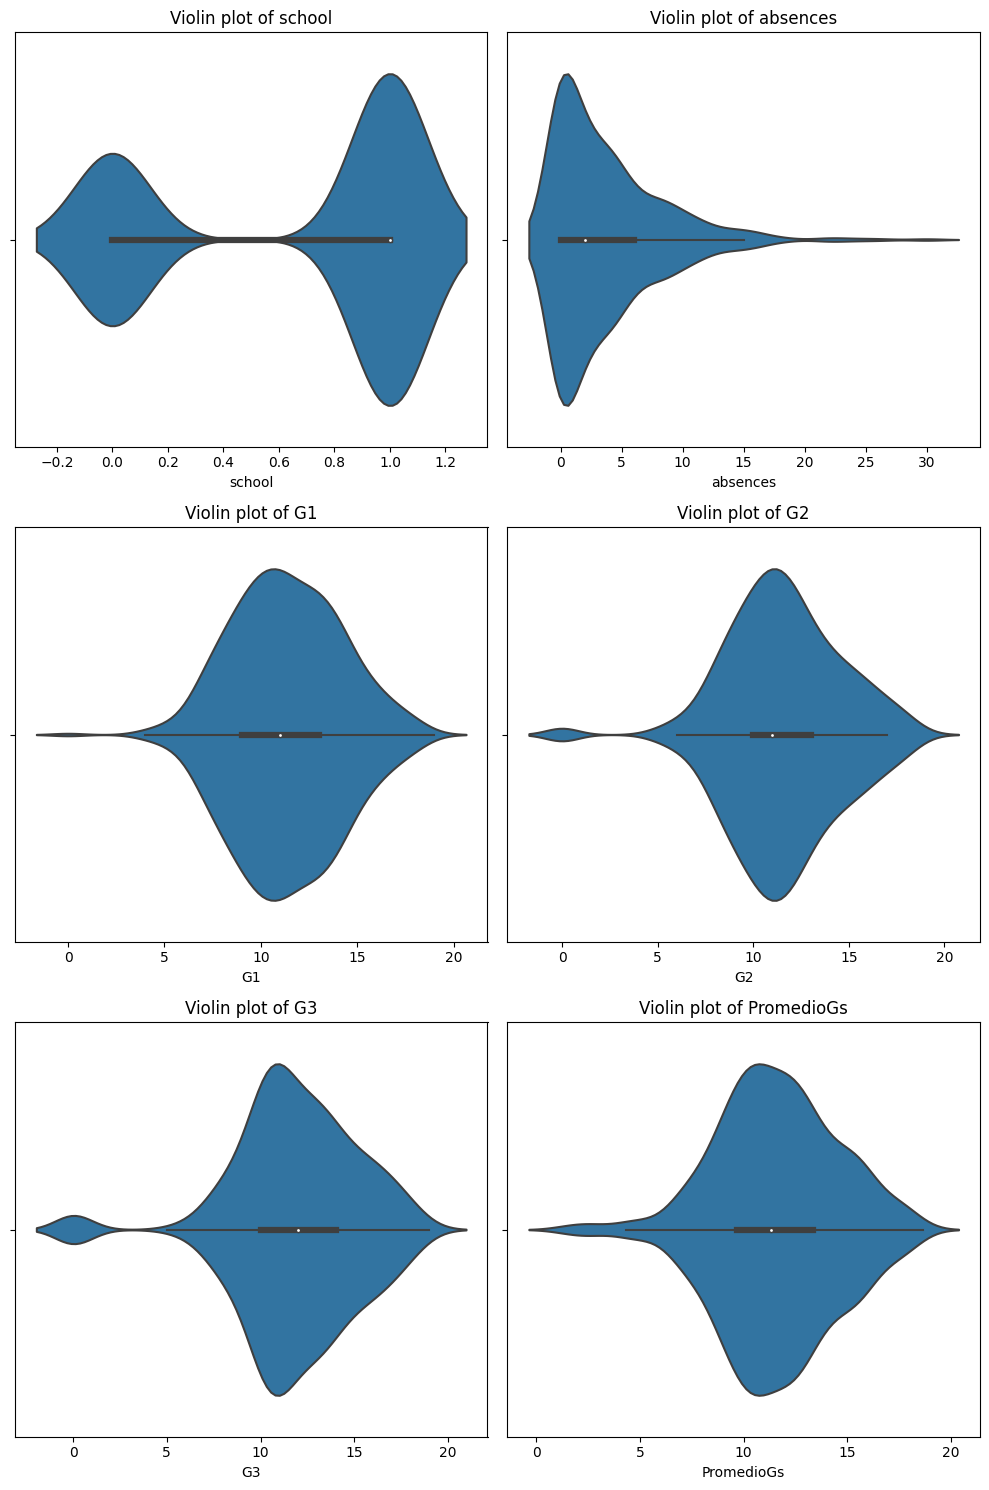

In [ ]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = school.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=school[column])
    plt.title(f'Violin plot of {column}')



plt.tight_layout()
plt.show()

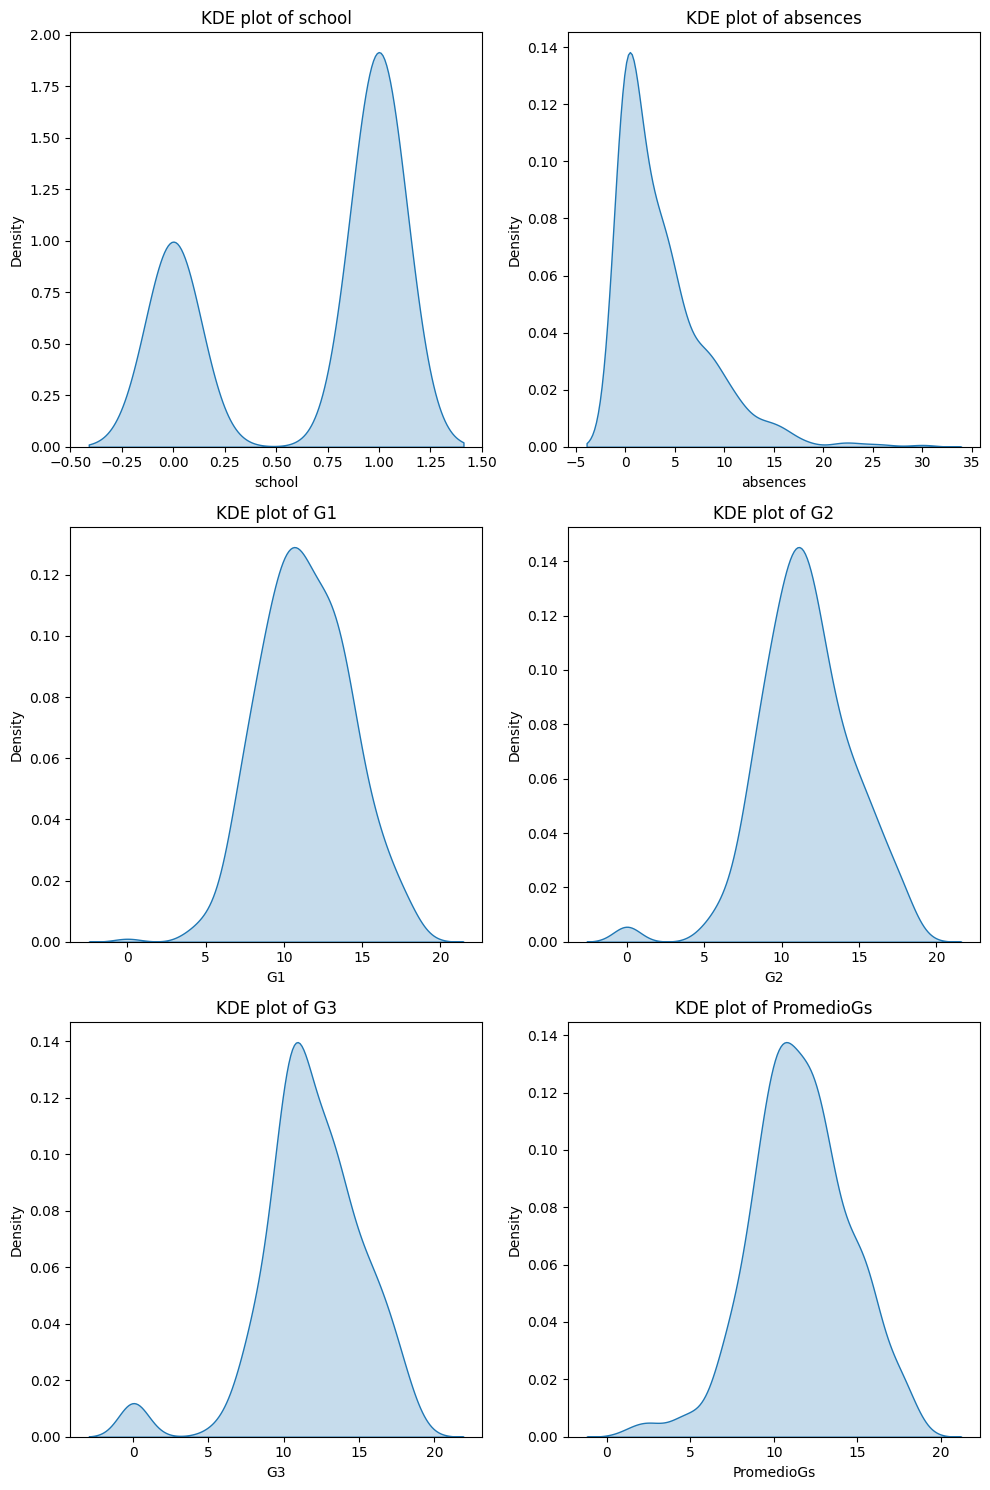

In [ ]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = school.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=school[column], fill=True)
    plt.title(f'KDE plot of {column}')



plt.tight_layout()
plt.show()

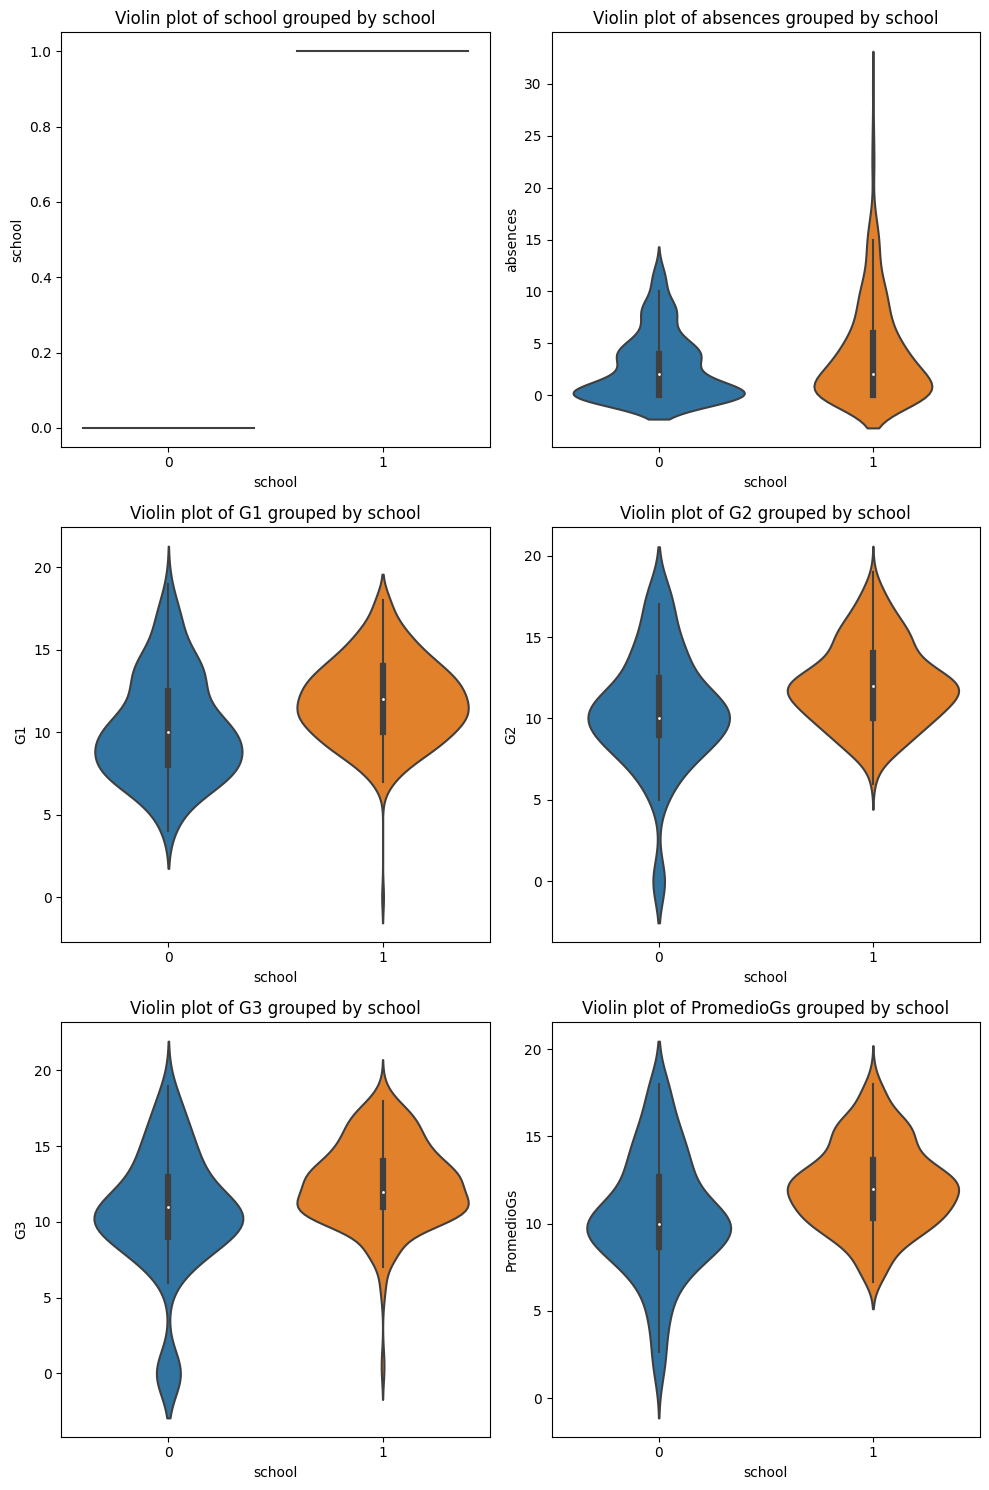

In [ ]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = school.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=school, x='school', y=column)
    plt.title(f'Violin plot of {column} grouped by school')



plt.tight_layout()
plt.show()

<ipython-input-59-48673e7740a0>:16: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-59-48673e7740a0>:17: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



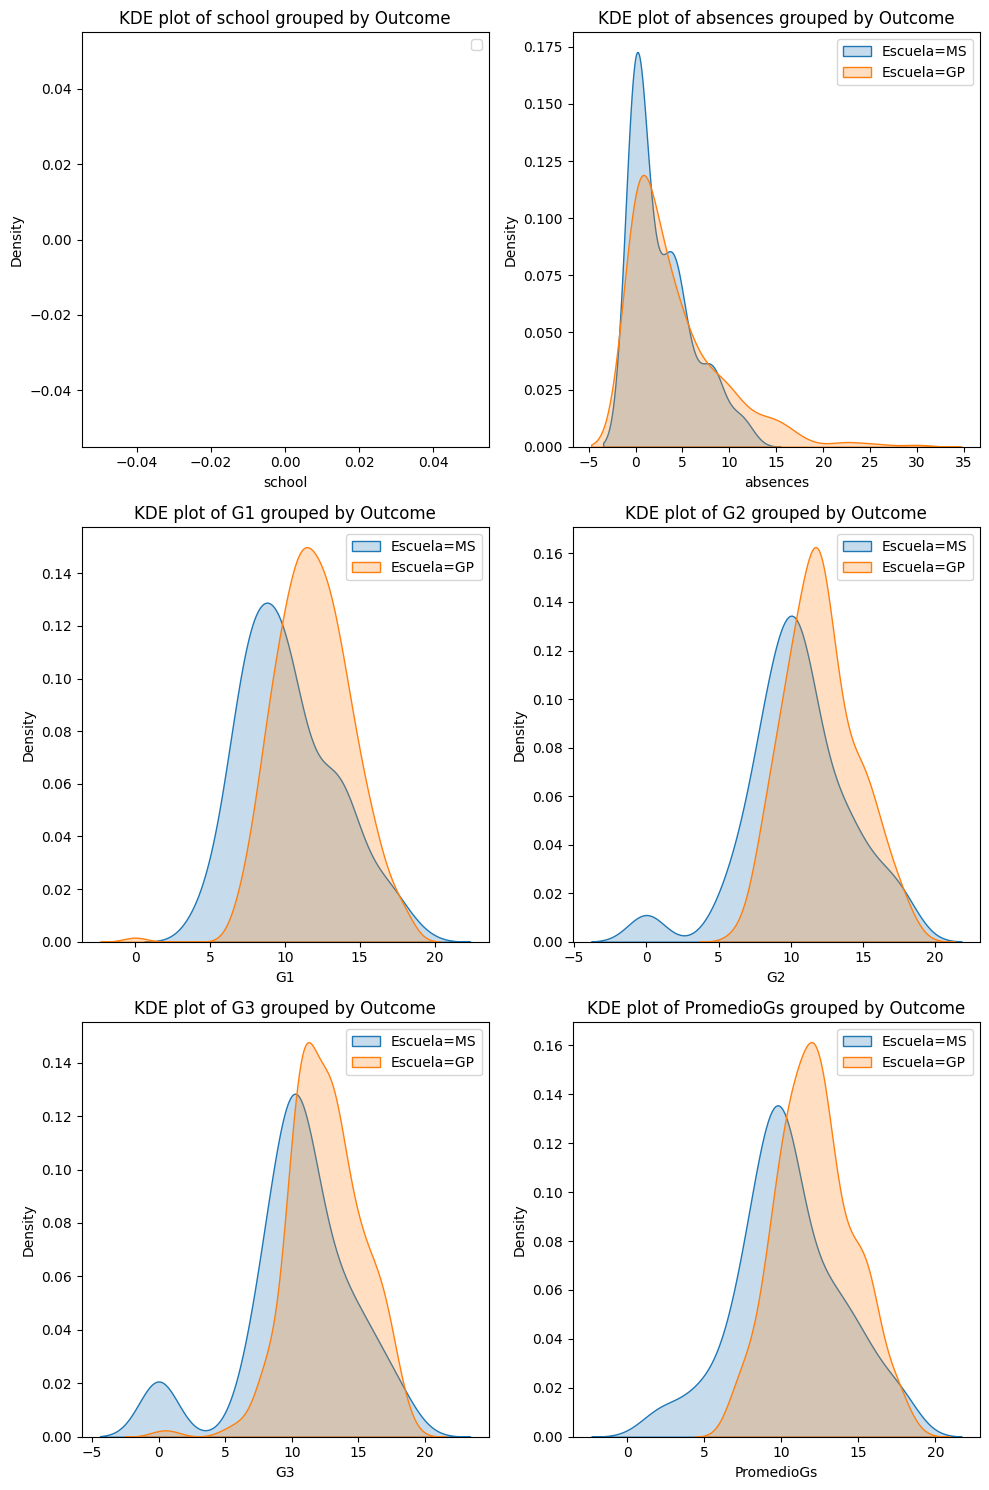

In [ ]:
numeric_columns = school.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=school[school['school']==0][column], label='Escuela=MS', fill=True)
    sns.kdeplot(data=school[school['school']==1][column], label='Escuela=GP', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()



plt.tight_layout()
plt.show()

# Comprobacion de dudas

In [ ]:
 MS=school.loc[(school['school'] == 0)]
 GP = school.loc[(school['school'] == 1)]
print(MS['PromedioGs'].mean())
print(GP['PromedioGs'].mean())


10.423001949317738
12.175278622087133


# Interpretación de Estudio Bivariante
#Ausencias por Cada Escuela:

Se puede observar que ambas escuelas tienen distribuciones de probabilidad muy parecidas en cuanto a las ausencias de los estudiantes. Sin embargo, la escuela GP muestra valores que se extienden hacia la cola derecha de la distribución. Ambas escuelas tienen medias bien definidas en alrededor de 4, pero la frecuencia de ausencias en la escuela MS parece ser más estable.

#Promedio Final de Cada Escuela:

La escuela GP presenta un mejor desempeño académico en comparación con la escuela MS, ya que se puede apreciar una mayor frecuencia de distribución en los lados derechos (representados por el color naranja) en comparación con los lados izquierdos (color azul). Además, la escuela MS muestra una mayor dispersión de valores en el lado izquierdo, indicando más frecuencias de calificaciones bajas. También se puede notar que la escuela GP tiene un promedio mayor, casi 2 puntos (una barbaridad) por encima de la escuela MS, lo cual sugiere que la escuela GP podría ser más exigente académicamente.

#Aplicación de la Regresion Logística



In [ ]:
import statsmodels.api as sm

X = school[['G1', 'G2', 'G3', 'PromedioGs','absences']]
y = school['school']

# Agregar una constante a X para estimar el término de intercepción
X = sm.add_constant(X)

# Crear un modelo de regresión lineal
model = sm.OLS(y, X)
# Ajustar el modelo a los datos
results = model.fit()
# Generar el resumen de la regresión
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 school   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     17.56
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.73e-13
Time:                        02:58:54   Log-Likelihood:                -303.42
No. Observations:                 500   AIC:                             616.8
Df Residuals:                     495   BIC:                             637.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.089     -0.036      0.9

# Análisis de la Regresión

Podemos ver que el coeficiente de determinación del R^2 fue muy bajo, por lo cual no es un modelo muy bueno y enterpretar los datos no tiene sentido alguno.

También nos manda mensaje de error, el cual ocurre cuando existe una alta correlación entre las variables que se usaron en el modelo.





# Scatter Plot

Text(0.5, 1.0, 'Diagrama de dispersion')

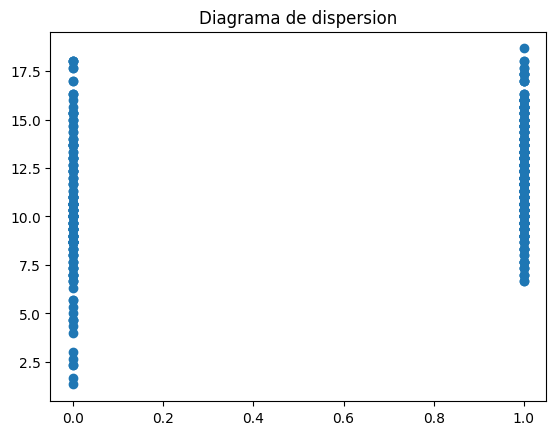

In [ ]:
plt.scatter(school['school'], school['PromedioGs'])
plt.title('Diagrama de dispersion')

# Análisis de la dispersión
Se puede observar que la escuela 1 (GP) tiene muchas mayor frecuencia en las altas calificaciones. También se puede observar que la escuela MS tiene bastante variación en los datos.
